In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
#load the data
data=pd.read_csv('online_store.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df=data.copy()

In [4]:
#preprocessing
#convert date to datetime
df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True,errors='coerce')
df['Ship Date']=pd.to_datetime(df['Ship Date'],dayfirst=True,errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [6]:
#postal code has missing value; we will handle the missing value
df.dropna(inplace=True)

In [7]:
#drop duplicates if any
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
2          3  CA-2017-138688 2017-06-12 2017-06-16    Second Class   
3          4  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
4          5  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9795    9796  CA-2017-125920 2017-05-21 2017-05-28  Standard Class   
9796    9797  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9797    9798  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9798    9799  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9799    9800  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

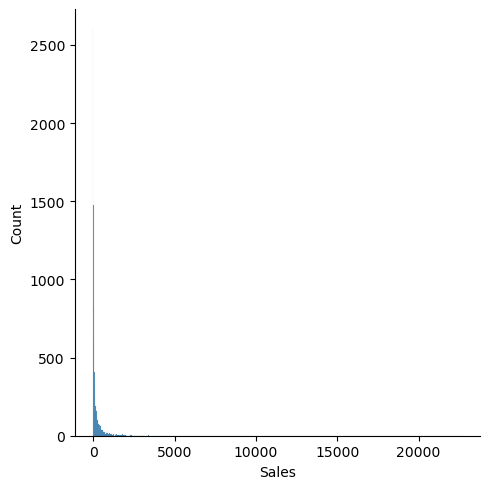

In [9]:
#checking for outliers in sales variables, since its the only continous valiables
sns.displot(df['Sales'])

In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9789.000000,9789,9789,9789.000000,9789.000000
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,230.116193
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2827.486899,NaN,NaN,32041.223413,625.302079


In [11]:
#dwscribing the dataset using plot and descriptive table revealed that the sales variables has extreme outlier
#detecting and treating outlier using IQR
Q1=df['Sales'].quantile(0.25)
Q3=df['Sales'].quantile(0.75)
IQR=Q3-Q1
lower,upper=Q1-1.5*IQR,Q3+1.5*IQR

#cap outliers
df['Sales']=np.where(df['Sales']>upper,upper,
                     np.where(df['Sales']<lower,lower,df['Sales']))

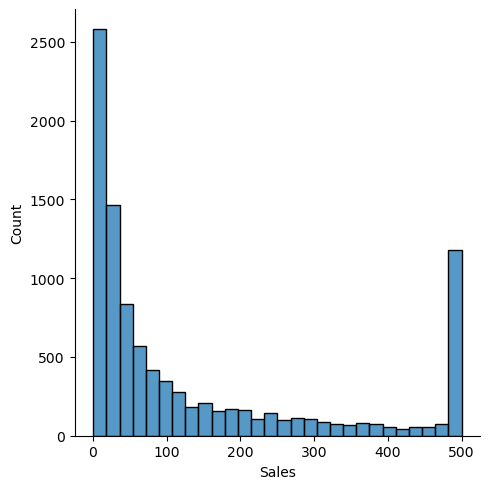

In [12]:
sns.displot(df['Sales'])

In [13]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9789.000000,9789,9789,9789.000000,9789.000000
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,140.614676
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,500.108000
std,2827.486899,NaN,NaN,32041.223413,169.301036


In [14]:
#RFM analysis
#reference date=last date in datase
ref_date=df['Order Date'].max()

In [15]:
#aggregrate at customer level
rfm=df.groupby('Customer ID').agg({
    'Order Date':lambda x:(ref_date-x.max()).days,  #recency
    'Order ID':'nunique',  #frequency
    'Sales':'sum'  #monetary
}).reset_index()
    
rfm.columns=['Customer ID','Recency','Frequency','Monetary']

#RFM Scoring (1-5 scale)
rfm['R_Score']=pd.qcut(rfm['Recency'],5,
labels=[5,4,3,2,1]).astype(int)
rfm['F_Score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,
labels=[1,2,3,4,5]).astype(int)
rfm['M_Score']=pd.qcut(rfm['Monetary'].rank(method='first'),5,
labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Segment']=(
    rfm['R_Score'].astype(str)
    +rfm['F_Score'].astype(str)
    +rfm['M_Score'].astype(str)
)    
rfm['RFM_Score']=(

rfm[['R_Score','F_Score','M_Score']].sum(axis=1)
)

In [16]:
rfm

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,AA-10315,184,5,1960.136,2,2,4,224,8
1,AA-10375,19,9,1056.390,5,5,2,552,12
2,AA-10480,259,4,1790.512,1,1,3,113,5
3,AA-10645,55,6,3089.132,3,3,5,335,11
4,AB-10015,415,3,886.156,1,1,2,112,4
...,...,...,...,...,...,...,...,...,...
788,XP-21865,43,11,2374.658,4,5,4,454,13
789,YC-21895,4,5,2069.688,5,3,4,534,12
790,YS-21880,9,8,3427.200,5,5,5,555,15
791,ZC-21910,54,13,4547.913,4,5,5,455,14


In [17]:
#Function to combine RFM score to business segment
def segment_rfm(score):
    if score>=13:
        return 'Champions'
    elif score>=10:
        return 'Loyal Customers'
    elif score>=7:
        return 'Potential Loyalist'
    elif score>=4:
        return 'At Risk'
    else:
        return 'Lost'
        
#Apply segmentation
rfm['Segment']=rfm['RFM_Score'].apply(segment_rfm)

#sort by RFM Score for visibility
rfm_sorted=rfm.sort_values(by='RFM_Score',ascending=False).reset_index(drop=True)

#preview the customers; top 50
print(rfm_sorted[['Customer ID','Recency','Frequency','Monetary','RFM_Score','Segment']].head(5000))


    Customer ID  Recency  Frequency   Monetary  RFM_Score    Segment
0      DS-13180       23          9  2673.1808         15  Champions
1      DK-12835       21         12  2883.6480         15  Champions
2      AH-10210        6          9  2874.3560         15  Champions
3      PK-19075        9         12  3633.7420         15  Champions
4      AI-10855       13         10  2970.4900         15  Champions
..          ...      ...        ...        ...        ...        ...
788    GP-14740      764          2   236.5300          3       Lost
789    GR-14560     1135          2   758.6080          3       Lost
790    TS-21085      357          2     4.8330          3       Lost
791    HD-14785      768          3   251.3600          3       Lost
792    LS-17230      776          3   368.8800          3       Lost

[793 rows x 6 columns]


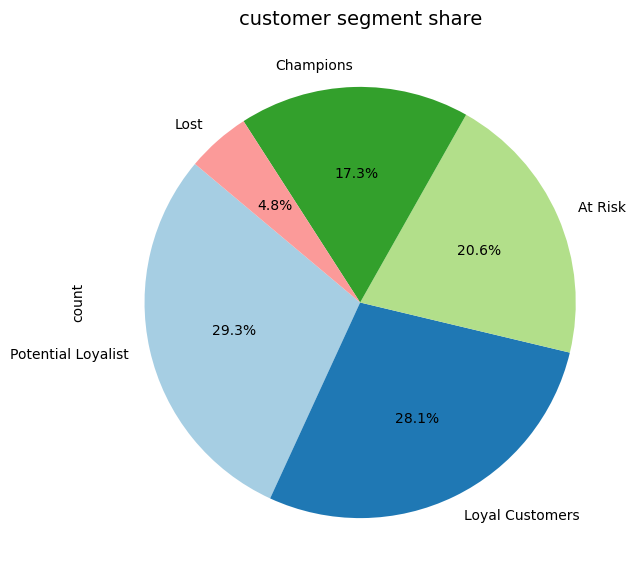

In [18]:
#using visualization
#count customers in each segments
segment_counts=rfm['Segment'].value_counts()

#pie chart
plt.figure(figsize=(7,7))
segment_counts.plot(kind='pie',autopct='%1.1f%%',startangle=140,colors=plt.cm.Paired.colors)
plt.title('customer segment share',fontsize=14)
plt.show()

In [19]:
#Create churn label
#define churn based on rfm segments
def churn_flag(segment):
    if segment in ['At Risk','Lost']:
        return 1
    else:
        return 0

rfm['Churn']=rfm['Segment'].apply(churn_flag)
rfm['Churn']

0      0
1      0
2      1
3      0
4      1
      ..
788    0
789    0
790    0
791    0
792    0
Name: Churn, Length: 793, dtype: int64

In [20]:
print('RFM table shape',rfm.shape)
print('unique customers in RFM',rfm['Customer ID'].nunique())

RFM table shape (793, 11)
unique customers in RFM 793


In [21]:
#full rfm table with churn
rfm_full=rfm[['Customer ID','Recency','Frequency','Monetary','RFM_Score','Segment','Churn']]
rfm_full.head(20)

,Customer ID,Recency,Frequency,Monetary,RFM_Score,Segment,Churn
0,AA-10315,184,5,1960.136,8,Potential Loyalist,0
1,AA-10375,19,9,1056.390,12,Loyal Customers,0
2,AA-10480,259,4,1790.512,5,At Risk,1
3,AA-10645,55,6,3089.132,11,Loyal Customers,0
4,AB-10015,415,3,886.156,4,At Risk,1
5,AB-10060,54,8,2363.808,12,Loyal Customers,0
6,AB-10105,41,10,4155.305,14,Champions,0
7,AB-10150,41,5,966.710,8,Potential Loyalist,0
8,AB-10165,25,8,1113.838,11,Loyal Customers,0
9,AB-10255,166,9,914.532,9,Potential Loyalist,0


In [22]:
#total number of churned vs active customers
churn_summary=rfm['Churn'].value_counts().rename(index={0:'Active',1:'Churned'})

#percentages
churn_percent=rfm['Churn'].value_counts(normalize=True).rename(index={0:'Active',1:'Churned'})*100

#Combine the table
churn_table=pd.DataFrame({
    'count':churn_summary,'percentage':churn_percent.round(2)
})
churn_table

,count,percentage
Churn,,
Active,592,74.65
Churned,201,25.35


In [23]:
#prediction using machine learning algorithms

In [24]:
#features and targets
x=rfm[['Recency','Frequency','Monetary']]
y=rfm['Churn']

In [25]:
#train,test and split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [26]:
#feature scalling(important for logistic regression and optional for the othe two models)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [27]:
#logistic regression model
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train_scaled,y_train)
y_pred_log=log_reg.predict(x_test_scaled)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [28]:
#random forest
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [29]:
#xgboost
xgb=XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=42,use_label_encoder=False,eval_metric='logloss')
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
y_pred_xgb

C:\Users\USER\anaconda3\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:22:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0])

In [31]:
#evaluation function
def evaluate_model(name,y_true,y_pred):
    print('{name} Results')
    print('Accuracy:',accuracy_score(y_true,y_pred))
    print('confusion matrix',confusion_matrix(y_true,y_pred))
    print('classification report',classification_report(y_true,y_pred))

In [32]:
#evaluate all models
evaluate_model('logostic regression',y_test,y_pred_log)

{name} Results
Accuracy: 0.9119496855345912
confusion matrix [[112   7]
 [  7  33]]
classification report               precision    recall  f1-score   support

           0       0.94      0.94      0.94       119
           1       0.82      0.82      0.82        40

    accuracy                           0.91       159
   macro avg       0.88      0.88      0.88       159
weighted avg       0.91      0.91      0.91       159



In [33]:
evaluate_model('random forest',y_test,y_pred_rf)

{name} Results
Accuracy: 0.9559748427672956
confusion matrix [[117   2]
 [  5  35]]
classification report               precision    recall  f1-score   support

           0       0.96      0.98      0.97       119
           1       0.95      0.88      0.91        40

    accuracy                           0.96       159
   macro avg       0.95      0.93      0.94       159
weighted avg       0.96      0.96      0.96       159



In [34]:
evaluate_model('xgboost',y_test,y_pred_xgb)

{name} Results
Accuracy: 0.9622641509433962
confusion matrix [[117   2]
 [  4  36]]
classification report               precision    recall  f1-score   support

           0       0.97      0.98      0.97       119
           1       0.95      0.90      0.92        40

    accuracy                           0.96       159
   macro avg       0.96      0.94      0.95       159
weighted avg       0.96      0.96      0.96       159

